In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from transforms import FourierTransform, MeanTransform

In [2]:
from dataset import HARDatasetCrops

## Data

### Features

In [3]:
dataset = HARDatasetCrops('motionsense-dataset/train', 256, 50, 50, metadata_file='motionsense-dataset/data_subjects_info.csv')

In [4]:
print('Dataset size:', len(dataset))

sample = dataset[0][0]
print('Datapoints shape:', sample.shape)

Dataset size: 4095
Datapoints shape: (256, 12)


Our dataset is composed of 5205 datapoints, each have shape `(256, 12)` because we have 12 signals of 256 samples each.

In [40]:
samples, _, _ = zip(*dataset)
X = np.array(samples)

In [41]:
X.shape

(4095, 256, 12)

In [39]:
dataset.FEATURES

['attitude.roll',
 'attitude.pitch',
 'attitude.yaw',
 'gravity.x',
 'gravity.y',
 'gravity.z',
 'rotationRate.x',
 'rotationRate.y',
 'rotationRate.z',
 'userAcceleration.x',
 'userAcceleration.y',
 'userAcceleration.z']

<ipython-input-50-7f3256205daf>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 1, 1)
<ipython-input-50-7f3256205daf>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4, 1, 2)
<ipython-input-50-7f3256205daf>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and r

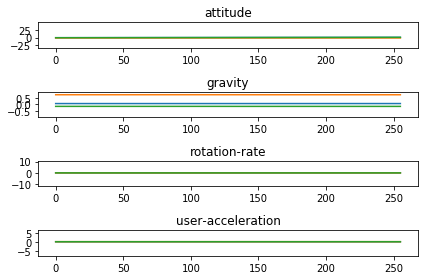

In [50]:
for i in range(len(dataset.FEATURES)):
    if 0 <= i < 3:
        plt.subplot(4, 1, 1)
        plt.title("attitude")
    elif 3 <= i < 6:
        plt.subplot(4, 1, 2)
        plt.title("gravity")
    elif 6 <= i < 9:
        plt.subplot(4, 1, 3)
        plt.title("rotation-rate")
    elif 9 <= i < 12:
        plt.subplot(4, 1, 4)
        plt.title("user-acceleration")
    plt.plot(X[:, :, i].mean(axis=0), label=dataset.FEATURES[i])  # TODO: plot with std err
    plt.ylim(X[:, :, i].min(), X[:, :, i].max())  # TODO: use quartiles instead of min and max.
plt.tight_layout()